<a href="https://colab.research.google.com/github/ozgurangers/respiratory-sound-diagnosis-ml/blob/main/notebooks/02_signal_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Preprocessing

This notebook describes the preprocessing steps applied to raw tracheal respiratory sound signals
before correlation-based feature extraction.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


## Preprocessing Overview

Raw tracheal respiratory sounds contain noise and amplitude variations.
To ensure consistent correlation analysis, the following preprocessing steps are applied:

1. Amplitude normalization  
2. Band-pass filtering  
3. Signal segmentation


In [7]:
fs = 8000  # Sampling frequency (Hz)
t = np.linspace(0, 2, 2 * fs)
raw_signal = 0.6 * np.sin(2 * np.pi * 200 * t) + 0.2 * np.random.randn(len(t))


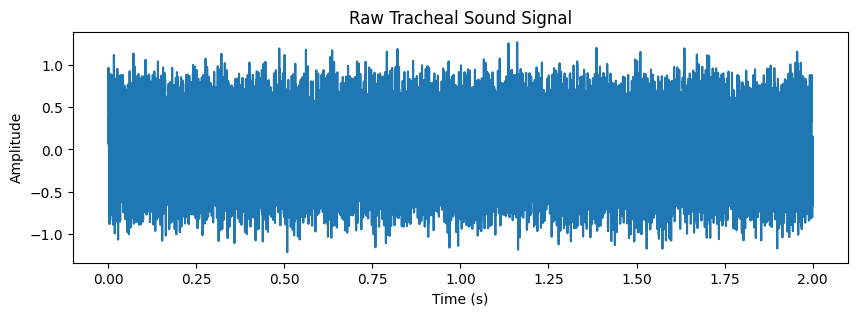

In [8]:
plt.figure(figsize=(10, 3))
plt.plot(t, raw_signal)
plt.title("Raw Tracheal Sound Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


## Amplitude Normalization

Signals are normalized to ensure that amplitude differences do not dominate
the correlation-based feature extraction process.


In [9]:
def normalize_signal(signal):
    return signal / np.max(np.abs(signal))

normalized_signal = normalize_signal(raw_signal)


## Band-Pass Filtering

A band-pass filter is applied to isolate the frequency range that contains
dominant respiratory sound components.


In [10]:
plt.figure(figsize=(10, 3))
plt.plot(t, filtered_signal)
plt.title("Preprocessed Tracheal Sound Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


NameError: name 'filtered_signal' is not defined

<Figure size 1000x300 with 0 Axes>

## Signal Segmentation

The preprocessed signal is segmented into fixed-length windows
to enable consistent correlation analysis across samples.


In [ ]:
segment_length = fs  # 1-second segments
num_segments = len(filtered_signal) // segment_length

segments = np.array([
    filtered_signal[i*segment_length:(i+1)*segment_length]
    for i in range(num_segments)
])

print("Number of segments:", segments.shape[0])
print("Segment shape:", segments.shape[1])


## Summary

This notebook demonstrated the preprocessing pipeline applied to tracheal respiratory sounds,
including normalization, band-pass filtering, and segmentation.
These steps prepare the signals for correlation map generation in the next stage.
